# <span class="bg-primary">18. MODELES METHODES ENSEMBLISTES</span>

# <span class="bg-info">BAGGING</span>

In [ ]:
# effet des méthodes ensemblistes sur un petit jeu de données factice, 
# afin de nous rendre compte de l'effet du bagging

In [17]:
# avoir les graphiques qui s'affichent directement
%matplotlib inline

# Chargement des librairies
import matplotlib.pyplot as plt

In [5]:
# Chargement du jeu de données : dataset de sikit learn 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

In [9]:
# Découpage du jeu de données en Train set et Test set
from sklearn.model_selection import train_test_split
# stratify permet de conserver les mêmes proportions de y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [10]:
X_train.shape

(75, 2)

In [12]:
X_test.shape

(25, 2)

In [13]:
# Chargement du modèle BaggingClassifier
from sklearn.ensemble import BaggingClassifier 

# Nombre de modèles d'apprenant faible = 5
bagging = BaggingClassifier(n_estimators=5)
# entrainement sur le train set
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=5)

In [15]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

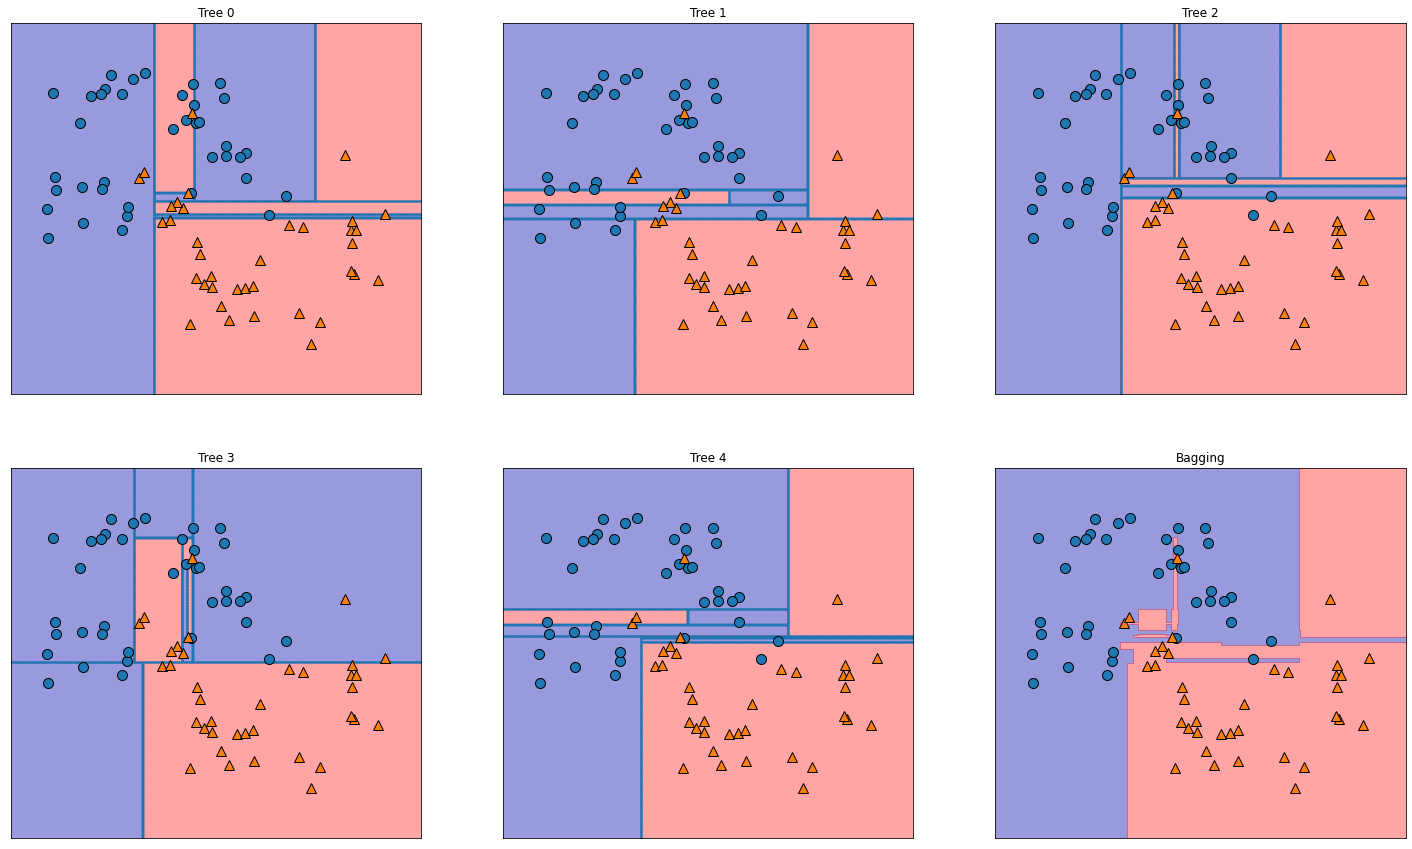

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
# la visualisation des résultats des arbres de décision
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
# le résultat de la combinaison de tous les estimateurs
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()
# on voit le résultat des différents arbres de décision Tree1...
# le dernier schéma est le modèle qui les combinent tous ==> moins d'erreurs
# et plus lissée

# <span class="bg-info">TP - Mesurez la puissance des forêts aléatoires</span>

In [23]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-18-MODELES_METHODES_ENSEMBLISTES')

In [27]:
# Chargement des librairies
import pandas as pd

In [29]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [30]:
# FEATURES ET TARGET DU TRAIN SET
X_train = train[train.columns[:-2]]
y_train = train['Activity']

In [31]:
# FEATURES ET TARGET DU TEST SET
X_test = test[test.columns[:-2]]
y_test = test['Activity']

In [32]:
print(train.shape)

(7352, 563)


In [33]:
print(test.shape)

(2947, 563)


In [35]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [36]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

# <span class="bg-warning">APPLICATION DES FORETS ALEATOIRES</span>

# BRUTE SANS NETTOYER LE JEU DE DONNEES

In [37]:
# Création RandomForestClassifier avec 1000 arbres de décisions
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, oob_score=True)

In [38]:
# entrainement pour voir quelles sont les features les plus intéressantes
model = rfc.fit(X_train, y_train)

In [40]:
# Evaluation du modèle BRUT
from sklearn.metrics import accuracy_score

pred = rfc.predict(X_test)
print("accuracy {:.2f}".format(accuracy_score(y_test, pred)))

accuracy 0.93


In [47]:
# Evalutation et temps du modèle BRUT SANS NETTOYAGE DES DONNEES

import timeit

start_time = timeit.default_timer()

pred = rfc.predict(X_test)
elapsed = timeit.default_timer() - start_time
accuracy = accuracy_score(y_test, pred)

print("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))

accuracy 0.93 time 0.36s


# NOUVEAU MODELE DE FORET ALEATOIRE

In [56]:
# Voir l'importance des différentes features et faire une première sélection
# des features les plus importantes
# pour SelectFromModel, il faut préciser un seuil : thresold qui donne le seuil
# de l'importance qui est caclulée, l'imortance relative des différentes 
# features dans les différents arbres normalisés : on commence par 0.1
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(rfc, prefit=True, threshold=0.003)
# on récupère le nouveau jeu d'entrainement dans un tableau X_train2
X_train2 = select.transform(X_train)
print(X_train2.shape)
# aucune feature sélectionnée ==> diminue le treshold 0.01 13 features
# gain sur la vitesse d'exécution du modèle

(7352, 84)


In [58]:
# création nouveau modèle de foret aléatoire avec

# rfc2 = RandomForestClassifier(n_estimators=1000, oob_score=True)
rfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)

# entraine le modèle
rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)

In [59]:
# Evalutation et temps du modèle AVEC NETTOYAGE DES DONNEES

start_time = timeit.default_timer()

pred = rfc2.predict(X_test2)
elapsed = timeit.default_timer() - start_time
accuracy = accuracy_score(y_test, pred)

print("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))
# gagné un peu de temps et perdu un peu en accuracy
# ==> avoir un peut moins de features en réglant le thresold
# au réduire le nombre d'arbre et baissé
# gagné 

accuracy 0.90 time 0.16s


In [ ]:
# <span class="bg-info"></span>

In [ ]:
# <span class="bg-warning"></span>